# Imports

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Constants

In [5]:
num_words = 10000
max_tweet_len = 100

# Load data

In [6]:
n = ['id', 'date', 'name', 'text', 'typr', 'rep', 'rtw', 'faw', 'stcount', 'foll', 'frien', 'listcount']
negative =pd.read_csv('/content/sample_data/negative.csv',delimiter=';',names=n,usecols=['text']) 
positive =pd.read_csv('/content/sample_data/positive.csv',delimiter=';',names=n,usecols=['text']) 

In [7]:
negative

,text
0,на работе был полный пиддес :| и так каждое за...
1,"Коллеги сидят рубятся в Urban terror, а я из-з..."
2,@elina_4post как говорят обещаного три года жд...
3,"Желаю хорошего полёта и удачной посадки,я буду..."
4,"Обновил за каким-то лешим surf, теперь не рабо..."
...,...
111918,Но не каждый хочет что то исправлять:( http://...
111919,скучаю так :-( только @taaannyaaa вправляет мо...
111920,"Вот и в школу, в говно это идти уже надо("
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :..."


In [8]:
positive

,text
0,"@first_timee хоть я и школота, но поверь, у на..."
1,"Да, все-таки он немного похож на него. Но мой ..."
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...
3,"RT @digger2912: ""Кто то в углу сидит и погибае..."
4,@irina_dyshkant Вот что значит страшилка :D\nН...
...,...
114906,"Спала в родительском доме, на своей кровати......"
114907,RT @jebesilofyt: Эх... Мы немного решили сокра...
114908,"Что происходит со мной, когда в эфире #proacti..."
114909,"""Любимая,я подарю тебе эту звезду..."" Имя како..."


In [9]:
sample_size = min(positive.shape[0], negative.shape[0])
raw_data = np.concatenate((positive['text'].values[:sample_size],
                           negative['text'].values[:sample_size]), axis=0)
labels = [1] * sample_size + [0] * sample_size

In [10]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [11]:
raw_data

array(['@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа)',
       'Да, все-таки он немного похож на него. Но мой мальчик все равно лучше:D',
       'RT @KatiaCheh: Ну ты идиотка) я испугалась за тебя!!!', ...,
       'Вот и в школу, в говно это идти уже надо(',
       'RT @_Them__: @LisaBeroud Тауриэль, не грусти :( *обнял*',
       'Такси везет меня на работу. Раздумываю приплатить, чтобы меня втащили на пятый этаж. Лифта то нет :('],
      dtype=object)

Предобработка текста


In [12]:
import re

def preprocess_text(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
    text = re.sub('@[^\s]+', 'USER', text)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


data = [preprocess_text(t) for t in raw_data]

In [13]:
data[:5]

['USER хоть я и школота но поверь у нас то же самое d общество профилирующий предмет типа',
 'да все таки он немного похож на него но мой мальчик все равно лучше d',
 'rt USER ну ты идиотка я испугалась за тебя',
 'rt USER кто то в углу сидит и погибает от голода а мы еще 2 порции взяли хотя уже и так жрать не хотим dd URL',
 'USER вот что значит страшилка d но блин посмотрев все части у тебя создастся ощущение что авторы курили что то d']

Токенизация текста


In [14]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенайзер на наборе данных


In [15]:
tokenizer.fit_on_texts(data)

Полученный словарь


In [16]:
tokenizer.word_index

{'user': 1,
 'не': 2,
 'я': 3,
 'и': 4,
 'в': 5,
 'на': 6,
 'rt': 7,
 'а': 8,
 'что': 9,
 'url': 10,
 'с': 11,
 'как': 12,
 'у': 13,
 'все': 14,
 'меня': 15,
 'то': 16,
 'это': 17,
 'так': 18,
 'мне': 19,
 'd': 20,
 'но': 21,
 'ты': 22,
 'ну': 23,
 'по': 24,
 'за': 25,
 'еще': 26,
 'уже': 27,
 'вот': 28,
 'да': 29,
 'же': 30,
 'только': 31,
 'сегодня': 32,
 'о': 33,
 'бы': 34,
 'нет': 35,
 'когда': 36,
 'очень': 37,
 'хочу': 38,
 'тебя': 39,
 'к': 40,
 'из': 41,
 'он': 42,
 'день': 43,
 'просто': 44,
 'будет': 45,
 'мы': 46,
 '3': 47,
 'от': 48,
 'тебе': 49,
 'было': 50,
 'если': 51,
 'теперь': 52,
 '2': 53,
 'надо': 54,
 'даже': 55,
 'тоже': 56,
 'завтра': 57,
 'кто': 58,
 'до': 59,
 'там': 60,
 'его': 61,
 'есть': 62,
 'вообще': 63,
 'она': 64,
 '1': 65,
 'для': 66,
 'сейчас': 67,
 'спасибо': 68,
 'нас': 69,
 'буду': 70,
 'почему': 71,
 'могу': 72,
 'блин': 73,
 'люблю': 74,
 'без': 75,
 'вы': 76,
 'они': 77,
 'знаю': 78,
 'тут': 79,
 'или': 80,
 'раз': 81,
 'мой': 82,
 'ничего': 83,

Слова в числовом представлении

In [17]:
sequences = tokenizer.texts_to_sequences(data)

In [18]:
index = 100
print(data[index])
print(sequences[index])

USER получается осторожно котлетку перекладываю в др посуду
[1, 467, 6061, 5, 420, 3963]


In [19]:
x_train = pad_sequences(sequences, maxlen=max_tweet_len)

In [20]:
labels = np.array(labels)

In [21]:
labels

array([1, 1, 1, ..., 0, 0, 0])

Сверточная нейронная сеть

In [119]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Embedding(num_words, 128, input_length=max_tweet_len))
model.add(Conv1D(256,9, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [130]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 128)          1280000   
                                                                 
 conv1d_8 (Conv1D)           (None, 92, 256)           295168    
                                                                 
 global_max_pooling1d_6 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_17 (Dense)            (None, 512)               131584    
                                                                 
 batch_normalization_9 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 512)             

In [120]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [121]:
model_save_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [122]:
history = model.fit(x_train, 
                    labels, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
      callbacks=[checkpoint_callback]
                  )

Epoch 1/10
1574/1574 [==============================] - ETA: 0s - loss: 0.4865 - accuracy: 0.7555
Epoch 1: val_accuracy improved from -inf to 0.76221, saving model to best_model.h5
1574/1574 [==============================] - 16s 10ms/step - loss: 0.4865 - accuracy: 0.7555 - val_loss: 0.4728 - val_accuracy: 0.7622
Epoch 2/10
1574/1574 [==============================] - ETA: 0s - loss: 0.3878 - accuracy: 0.8207
Epoch 2: val_accuracy did not improve from 0.76221
1574/1574 [==============================] - 15s 10ms/step - loss: 0.3878 - accuracy: 0.8207 - val_loss: 0.6742 - val_accuracy: 0.6667
Epoch 3/10
1572/1574 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.8840
Epoch 3: val_accuracy did not improve from 0.76221
1574/1574 [==============================] - 15s 10ms/step - loss: 0.2702 - accuracy: 0.8840 - val_loss: 0.7226 - val_accuracy: 0.6870
Epoch 4/10
1574/1574 [==============================] - ETA: 0s - loss: 0.1663 - accuracy: 0.9325
Epoch 4: val_accur

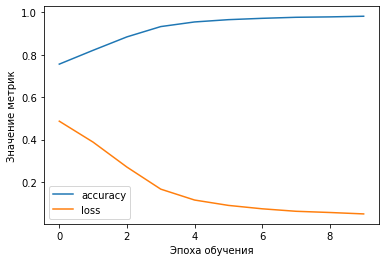

In [135]:
plt.plot(history.history['accuracy'], 
         label='accuracy')
plt.plot(history.history['loss'], 
         label='loss')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение метрик')
plt.legend()
plt.show()

In [59]:
model.load_weights(model_save_path)

Рекуррентная нейронная сеть

In [132]:
from tensorflow.keras.layers import LSTM
modelLSTM = Sequential()
modelLSTM.add(Embedding(num_words, 64, input_length=max_tweet_len))
modelLSTM.add(LSTM(256))
modelLSTM.add(Dense(1, activation='sigmoid'))

In [133]:
modelLSTM.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 64)           640000    
                                                                 
 lstm_3 (LSTM)               (None, 256)               328704    
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


In [61]:
modelLSTM.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [62]:
modelLSTM_save_path = 'best_modelLSTM.h5'
checkpointLSTM_callback = ModelCheckpoint(modelLSTM_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [63]:
history_1 = modelLSTM.fit(x_train, 
                    labels, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                      callbacks=[checkpointLSTM_callback]
                )

Epoch 1/10
1573/1574 [============================>.] - ETA: 0s - loss: 0.4938 - accuracy: 0.7496
Epoch 1: val_accuracy improved from -inf to 0.72482, saving model to best_modelLSTM.h5
1574/1574 [==============================] - 27s 16ms/step - loss: 0.4938 - accuracy: 0.7497 - val_loss: 0.5416 - val_accuracy: 0.7248
Epoch 2/10
1572/1574 [============================>.] - ETA: 0s - loss: 0.4357 - accuracy: 0.7891
Epoch 2: val_accuracy did not improve from 0.72482
1574/1574 [==============================] - 25s 16ms/step - loss: 0.4357 - accuracy: 0.7891 - val_loss: 0.5256 - val_accuracy: 0.7156
Epoch 3/10
1573/1574 [============================>.] - ETA: 0s - loss: 0.4020 - accuracy: 0.8079
Epoch 3: val_accuracy did not improve from 0.72482
1574/1574 [==============================] - 25s 16ms/step - loss: 0.4020 - accuracy: 0.8079 - val_loss: 0.5821 - val_accuracy: 0.6890
Epoch 4/10
1574/1574 [==============================] - ETA: 0s - loss: 0.3700 - accuracy: 0.8253
Epoch 4: val_a

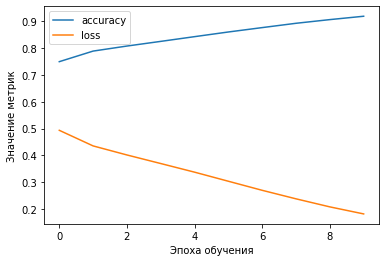

In [136]:
plt.plot(history_1.history['accuracy'], 
         label='accuracy')
plt.plot(history_1.history['loss'], 
         label='loss')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение метрик')
plt.legend()
plt.show()

Предсказание моделей

In [124]:
modelLSTM.load_weights(modelLSTM_save_path)

In [125]:
text = 'Я очень рада, что наконец-то выпал первый снег'
negtext='ужасное обслуживание, недружелюбные продавцы'

In [126]:
sequence = tokenizer.texts_to_sequences([negtext])

In [127]:
data = pad_sequences(sequence, maxlen=max_tweet_len)

In [128]:
result = model.predict(data)

1/1 [==============================] - 0s 81ms/step


In [129]:
if result < 0.5:
    print('Отзыв отрицательный')
else:
    print('Отзыв положительный')

Отзыв отрицательный
